In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

In [9]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

100% 1.76G/1.76G [00:07<00:00, 278MB/s]
100% 1.76G/1.76G [00:07<00:00, 255MB/s]


In [10]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [11]:
loc1 = '/content/lung_colon_image_set/lung_image_sets'
loc2 = '/content/lung_colon_image_set/colon_image_sets'

In [12]:
import cv2
from tqdm import tqdm
features = []

for dir in os.listdir(loc1):
    sub_dir = os.path.join(loc1,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
        f = cv2.resize(f , (70,70))
        features.append(f)
        
for dir in os.listdir(loc2):
    sub_dir = os.path.join(loc2,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
        f = cv2.resize(f , (70,70))
        features.append(f)

/content/lung_colon_image_set/lung_image_sets/lung_n
*************


100%|██████████| 5000/5000 [00:28<00:00, 174.62it/s]


/content/lung_colon_image_set/lung_image_sets/lung_scc
*************


100%|██████████| 5000/5000 [00:29<00:00, 167.62it/s]


/content/lung_colon_image_set/lung_image_sets/lung_aca
*************


100%|██████████| 5000/5000 [00:29<00:00, 168.69it/s]


/content/lung_colon_image_set/colon_image_sets/colon_aca
*************


100%|██████████| 5000/5000 [00:32<00:00, 151.62it/s]


/content/lung_colon_image_set/colon_image_sets/colon_n
*************


100%|██████████| 5000/5000 [00:30<00:00, 162.45it/s]


In [13]:
import numpy as np
X = np.array(features)
print(X.shape)

(25000, 70, 70, 3)


In [14]:
labels = []
i = 0

for dir in os.listdir(loc1):
    sub_dir = os.path.join(loc1,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1
    
for dir in os.listdir(loc2):
    sub_dir = os.path.join(loc2,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1

/content/lung_colon_image_set/lung_image_sets/lung_n
*************


100%|██████████| 5000/5000 [00:00<00:00, 1582517.36it/s]


/content/lung_colon_image_set/lung_image_sets/lung_scc
*************


100%|██████████| 5000/5000 [00:00<00:00, 1310883.86it/s]


/content/lung_colon_image_set/lung_image_sets/lung_aca
*************


100%|██████████| 5000/5000 [00:00<00:00, 1277582.70it/s]


/content/lung_colon_image_set/colon_image_sets/colon_aca
*************


100%|██████████| 5000/5000 [00:00<00:00, 1594792.40it/s]


/content/lung_colon_image_set/colon_image_sets/colon_n
*************


100%|██████████| 5000/5000 [00:00<00:00, 1963625.47it/s]


In [15]:
Y = np.array(labels)
print(Y.shape)

(25000,)


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [17]:
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()

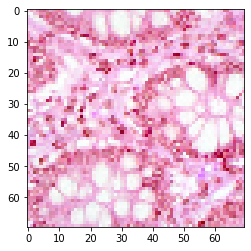

In [18]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[15600])
plt.show()

In [19]:
import tensorflow as tf

ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [20]:
from keras import layers, models, regularizers

In [21]:
model = models.Sequential()

model.add(layers.Conv2D(32 ,(3,3) , padding = 'same' , input_shape = (70,70,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(512 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(1024 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512 , activation='relu' ))
model.add(layers.Dense(5, activation='sigmoid') )

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 activation (Activation)     (None, 70, 70, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 35, 35, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                    

In [23]:
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(0.01)
model.compile(loss='categorical_crossentropy' , optimizer=sgd , metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,
         epochs=20,
         validation_data=(xtest,ytest))

Epoch 1/20
586/586 [==============================] - 934s 2s/step - loss: 1.2810 - accuracy: 0.4038 - val_loss: 0.8054 - val_accuracy: 0.6542
Epoch 2/20
 85/586 [===>..........................] - ETA: 11:39 - loss: 0.9474 - accuracy: 0.5665

In [ ]:
model.evaluate(xtrain,ytrain)

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
ytrainR = [np.argmax(val) for val in ytrain]
ytrainP = [np.argmax(val) for val in model.predict(xtrain)]

In [ ]:
ytestR = [np.argmax(val) for val in ytest]
ytestP = [np.argmax(val) for val in model.predict(xtest)]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytrainR,ytrainP)

In [ ]:
confusion_matrix(ytestR,ytestP)

In [ ]:
cancer_cells = ['lung_aca' , 'lung_scc' , 'lung_n' , 'colon_aca' , 'colon_n']

In [ ]:
model.predict(xtest[689].reshape(1,70,70,3))

In [ ]:
print('Predicted Value-' , cancer_cells[np.argmax(model.predict(xtest[16].reshape(1,70,70,3)))])
print('Real Value-' , cancer_cells[np.argmax(ytest[16])])

plt.imshow(xtest[16])
plt.show()